# TE 360 Final Project - Divvy Dataset Exploration

Prerequisites:

1. Download the Quarterly/monthly datasets from 2015 to 2019 from https://divvybikes.com/system-data
2. Place them in a folder named 'datasets' in your main directory
3. `pip3 install -r requirements.txt`


## Import essential libraries and dataset

Since there are separate CSVs for each year, we populate a dictionary indexed by the year. Ignore the datatype warings generated by Pandas as each year is formatted slightly differently.


In [1]:
# Base Python
import os
import typing

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

divvy_dfs: list[pd.DataFrame] = []
for f in os.listdir(os.getcwd() + "/datasets"):
    divvy_dfs.append(pd.read_csv(os.getcwd() + f"/datasets/{f}"))

divvy_dfs


[        trip_id        starttime       stoptime  bikeid  tripduration  \
 0       4738454  3/31/2015 23:58  4/1/2015 0:03    1095           299   
 1       4738450  3/31/2015 23:59  4/1/2015 0:15     537           940   
 2       4738449  3/31/2015 23:59  4/1/2015 0:11    2350           751   
 3       4738448  3/31/2015 23:59  4/1/2015 0:19     938          1240   
 4       4738445  3/31/2015 23:54  4/1/2015 0:15     379          1292   
 ...         ...              ...            ...     ...           ...   
 202344  4413174    1/1/2015 0:13  1/1/2015 0:16     705           148   
 202345  4413172    1/1/2015 0:10  1/1/2015 0:16    1586           380   
 202346  4413171    1/1/2015 0:07  1/1/2015 0:26     528          1140   
 202347  4413170    1/1/2015 0:08  1/1/2015 0:10    2147           111   
 202348  4413169    1/1/2015 0:08  1/1/2015 0:13     713           304   
 
         from_station_id               from_station_name  to_station_id  \
 0                   117        Wil

In [2]:
divvy_complete_df = pd.concat(divvy_dfs, ignore_index=True, sort=False)

divvy_complete_df.head()


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,...,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,4738454.0,3/31/2015 23:58,4/1/2015 0:03,1095.0,299,117.0,Wilton Ave & Belmont Ave,300.0,Broadway & Barry Ave,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4738450.0,3/31/2015 23:59,4/1/2015 0:15,537.0,940,43.0,Michigan Ave & Washington St,85.0,Michigan Ave & Oak St,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4738449.0,3/31/2015 23:59,4/1/2015 0:11,2350.0,751,162.0,Damen Ave & Wellington Ave,67.0,Sheffield Ave & Fullerton Ave,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4738448.0,3/31/2015 23:59,4/1/2015 0:19,938.0,1240,51.0,Clark St & Randolph St,59.0,Wabash Ave & Roosevelt Rd,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4738445.0,3/31/2015 23:54,4/1/2015 0:15,379.0,1292,134.0,Peoria St & Jackson Blvd,216.0,California Ave & Division St,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
divvy_complete_df.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'start_time',
       'end_time', '01 - Rental Details Rental ID',
       '01 - Rental Details Local Start Time',
       '01 - Rental Details Local End Time', '01 - Rental Details Bike ID',
       '01 - Rental Details Duration In Seconds Uncapped',
       '03 - Rental Start Station ID', '03 - Rental Start Station Name',
       '02 - Rental End Station ID', '02 - Rental End Station Name',
       'User Type', 'Member Gender',
       '05 - Member Details Member Birthday Year'],
      dtype='object')

## Fix/Clean Data

We now need to fix and clean our data to make it ready to analyze.


In [17]:
divvy_cleaned_df = divvy_complete_df.copy(deep=True)

In [18]:
column_mapping = {
    "trip_id": "01 - Rental Details Rental ID",
    "bikeid": "01 - Rental Details Bike ID",
    "tripduration": "01 - Rental Details Duration In Seconds Uncapped",
    "from_station_id": "03 - Rental Start Station ID",
    "from_station_name": "03 - Rental Start Station Name",
    "to_station_id": "02 - Rental End Station ID",
    "to_station_name": "02 - Rental End Station Name",
    "usertype": "User Type",
    "gender": "Member Gender",
    "birthyear": "05 - Member Details Member Birthday Year",
    "start_time": "01 - Rental Details Local Start Time",
    "end_time": "01 - Rental Details Local End Time",
    "starttime": "start_time",
    "stoptime": "end_time",
}

for key, val in column_mapping.items():
    print(f"{key}:{val}")
    divvy_cleaned_df[key] = divvy_cleaned_df[key].fillna(divvy_cleaned_df[val])


trip_id:01 - Rental Details Rental ID
bikeid:01 - Rental Details Bike ID
tripduration:01 - Rental Details Duration In Seconds Uncapped
from_station_id:03 - Rental Start Station ID
from_station_name:03 - Rental Start Station Name
to_station_id:02 - Rental End Station ID
to_station_name:02 - Rental End Station Name
usertype:User Type
gender:Member Gender
birthyear:05 - Member Details Member Birthday Year
start_time:01 - Rental Details Local Start Time
end_time:01 - Rental Details Local End Time
starttime:start_time
stoptime:end_time


In [19]:
divvy_cleaned_df = divvy_cleaned_df.drop(columns=column_mapping.values())

In [20]:
divvy_cleaned_df.isnull().sum(0)

trip_id                    0
starttime                  0
stoptime                   0
bikeid                     0
tripduration               0
from_station_id            0
from_station_name          0
to_station_id              0
to_station_name            0
usertype                   0
gender               3746938
birthyear            3718698
dtype: int64

In [27]:
divvy_cleaned_df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4738454.0,3/31/2015 23:58,4/1/2015 0:03,1095.0,299,117.0,Wilton Ave & Belmont Ave,300.0,Broadway & Barry Ave,Subscriber,Male,1994.0
1,4738450.0,3/31/2015 23:59,4/1/2015 0:15,537.0,940,43.0,Michigan Ave & Washington St,85.0,Michigan Ave & Oak St,Customer,NaN,NaN
2,4738449.0,3/31/2015 23:59,4/1/2015 0:11,2350.0,751,162.0,Damen Ave & Wellington Ave,67.0,Sheffield Ave & Fullerton Ave,Subscriber,Male,1992.0
3,4738448.0,3/31/2015 23:59,4/1/2015 0:19,938.0,1240,51.0,Clark St & Randolph St,59.0,Wabash Ave & Roosevelt Rd,Customer,NaN,NaN
4,4738445.0,3/31/2015 23:54,4/1/2015 0:15,379.0,1292,134.0,Peoria St & Jackson Blvd,216.0,California Ave & Division St,Subscriber,Male,1976.0


It's okay that we have some missing values in gender/birthyear since they are only available if the customer is a subscriber.

## Preliminary Analysis

We're going to explore the dataset first before investigating our main hypothesis. However, there are some "mini" hypotheses that can be answered by the following cells:

1) There will be an even number of male/female divvy riders. I believe this will be the case because I can't see a reason why it would be skewed one way or another.

2) There will be more trips by subscribed members than non-subscribed members. This is because even though there are probably less subscribed members, each subscribed member will go on a lot of trips (the dataset is one row per trip).
   
3) The mode birthyear will be around 1994. This is because in 2015, a birthyear of 1995 is around 21 years and in 2019 is would be 25 years old. I predict the average rider will be early 20s, so this makes sense. I'd like to analyze the mode age later by combining birthyear and date of trip.

NOTES: Compare rides by season

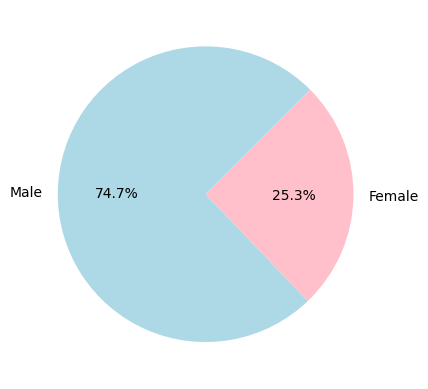

In [23]:
gender_count = divvy_cleaned_df['gender'].value_counts()
plt.pie(gender_count.values, labels=gender_count.index, startangle=45, colors=['lightblue', 'pink'], autopct='%1.1f%%')
plt.show()

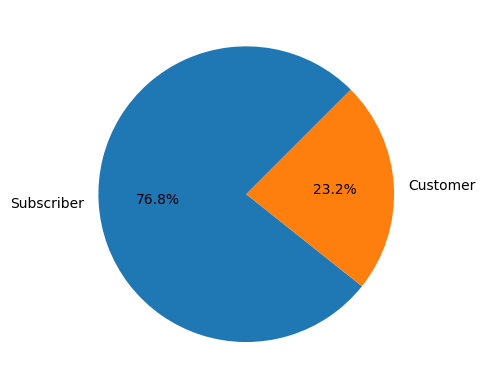

In [25]:
user_type_count = divvy_cleaned_df['usertype'].value_counts()
plt.pie(user_type_count.values[:2], labels=user_type_count.index[:2], startangle=45, autopct='%1.1f%%')
plt.show()

Text(0, 0.5, 'Frequency')

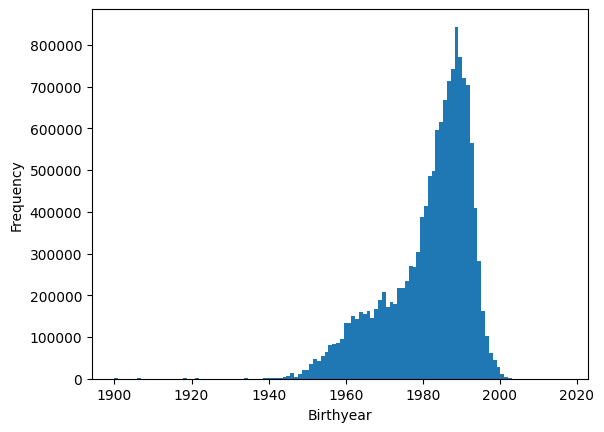

In [46]:
birthyears_cleaned = divvy_cleaned_df['birthyear'].dropna().loc[lambda x: x >= 1900] # Filter out anyone born before 1900 because they're dead

plt.hist(birthyears_cleaned, bins=118)
plt.xlabel("Birthyear")
plt.ylabel("Frequency")

In [47]:
birthyears_cleaned.mode()

0    1989.0
Name: birthyear, dtype: float64